# **Sesión 2:** Procesamiento de Imágenes ⚙️🖼️

## **Instalaciones**

In [2]:
!pip install scikit-image

## **Librerías**

In [3]:
import os
import cv2
import imageio
import numpy as np
from typing import List
from utils import non_max_suppression, get_hsv_color_ranges

## **Apartado A: Segmentación por color**

El objetivo de este apartado es segmentar los colores naranja y blanco de las imágenes en la carpeta ``data``.

1. **Tarea A.1**. Defina y ejecute el método para cargar imágenes ``load_imgs()``.
2. **Tarea A.2.** Defina los métodos ``show_image()`` y ``write_image()`` para visualizar y guardar imágenes.
3. **Tarea A.3.** Cambia el espacio de color de las imágenes a uno donde la crominancia y la intensidad estén separados (HSV).
4. **Tarea A.4.** Segmenta los colores anaranjados.
5. **Tarea A.5.** Segmenta los colores blancos.
6. **Tarea A.6.** Junta las máscaras para cada imagen (naranja + blanco) y segmenta cada una de ellas.
7. **Tarea A.7.** Guarda las imágenes.

### **Tarea A.1:** Defina y ejecute el método para cargar imágenes ``load_images()``

In [4]:
def load_images(filenames: List) -> List:
    return [cv2.imread(filename) for filename in filenames]

In [5]:
# Build a list containing the paths of all images in the data folder

from os.path import dirname, join

path = join(dirname(os.getcwd()), "data")

imgs_path = [join(path, f"{img_path}") for img_path in os.listdir(path)]

imgs = load_images(imgs_path)

### **Tarea A.2**. Defina los métodos ``show_image()`` y ``write_image()`` para visualizar y guardar imágenes

In [6]:
# Complete the method, use every argument    
def show_image(img: np.array, title: str = "Image"):
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    
def write_image(img: np.array, path: str):
    cv2.imwrite(path, img)

### **Tarea A.3:** Cambie el espacio de color de las imágenes a uno donde la crominancia y la intensidad estén separados (HSV)

In [7]:
# Get a list with ìmgs in HSV color space
hsv_imgs = [cv2.cvtColor(img, code=cv2.COLOR_BGR2HSV) for img in imgs]

### **Tarea A.4:** Segmente los colores anaranjados

In [8]:
# Define orange color range
light_orange = (1, 225, 140)
dark_orange = (20, 255, 255)

# Compute a list that contains a mask (which should segment orange colors) for every image.
orange_masks = [cv2.inRange(img, light_orange, dark_orange) for img in hsv_imgs]

# Compute a list that contains the result of multiplying the original image with its orange colors mask.

orange_segmented = [cv2.bitwise_and(img_ori, img_ori, mask=img_mask) for img_ori, img_mask in zip(imgs, orange_masks)]

# Show an original image
show_image(imgs[0])

# Show a mask
show_image(orange_masks[0])

# Show a segmented image
show_image(orange_segmented[0])

### **Tarea A.5:** Segmente los colores blancos.

Para detectar el rango de blancos complete la siguiente celda y ejecutela para investigar el rango de valores necesarios.

In [9]:
# Discover white color ranges
# get_hsv_color_ranges(imgs[0])

In [10]:
# Define white color range
light_white = (0, 0, 135)
dark_white = (125, 125, 255)

# Compute a list that contains a mask (which should segment orange colors) for every image.
white_masks = [cv2.inRange(img, light_white, dark_white) for img in hsv_imgs]

# Compute a list that contains the result of multiplying the original image with its orange colors mask.

white_segmented = [cv2.bitwise_and(img_ori, img_ori, mask=img_mask) for img_ori, img_mask in zip(imgs, white_masks)]

# Show an original image
show_image(imgs[0])

# Show a mask
show_image(white_masks[0])

# Show a segmented image
show_image(white_segmented[0])

### **Tarea A.6:** Junte las máscaras para cada imagen (naranja + blanco) y segmente cada una de ellas.

In [11]:
# Join orange_masks and white_masks
fish_masks = [cv2.bitwise_or(orange_mask, white_mask) for orange_mask, white_mask in zip(orange_masks, white_masks)]
    
# Compute a list that contains the result of multiplying the original image with its orange colors mask.
fish = [cv2.bitwise_and(img_ori, img_ori, mask=img_mask) for img_ori, img_mask in zip(imgs, fish_masks)]

# Show an original image
show_image(imgs[0])

# Show a mask
show_image(fish_masks[0])

# Show a segmented image
show_image(fish[0])

### **Pregunta A.1:** Segmente por color el escudo de su equipo deportivo favorito: descompóngalo en al menos 2 colores. 

In [12]:
# Homework
path = join(dirname(os.getcwd()))

img_path = join(path, f"escudo_equipo.jpeg")

img = cv2.imread(img_path)
hsv_img = cv2.cvtColor(img, code=cv2.COLOR_BGR2HSV)

show_image(img)

light_yellow = (0, 160, 170)
dark_yellow = (200, 255, 255)
yellow_mask = cv2.inRange(hsv_img, light_yellow, dark_yellow)
yellow_segmented = cv2.bitwise_and(img, img, mask=yellow_mask)
show_image(yellow_segmented)

light_blue = (90, 160, 50)
dark_blue = (110, 255, 160)
blue_mask = cv2.inRange(hsv_img, light_blue, dark_blue)
blue_segmented = cv2.bitwise_and(img, img, mask=blue_mask)
show_image(blue_segmented)

light_grey = (0, 0, 150)
dark_grey = (160, 150, 220)
grey_mask = cv2.inRange(hsv_img, light_grey, dark_grey)
grey_segmented = cv2.bitwise_and(img, img, mask=grey_mask)
show_image(grey_segmented)

### **Pregunta A.2:** ¿Qué ocurre si carga las imágenes con la función ``imageio.read()`` y luego la muestra con el método ``show_image()``? ¿A qué se debe este comportamiento?

In [13]:
def load_images(filenames: List) -> List:
    return [imageio.imread(filename) for filename in filenames]

# Homework: Load images
question_imgs = load_images(imgs_path)

# Homework: Show it
for img in question_imgs:
    show_image(img)

C:\Users\javie\AppData\Local\Temp\ipykernel_17296\3272552856.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


El problema es que imageio.imread() carga la imagen en formato RGB (Rojo, Verde y Azul), mientras que cv2.imshow() espera imágenes en formato BGR (Azul, Verde, Rojo), por tanto, los colores aparecen distorsionados.

## **Apartado B:** Filtro Gaussiano y Detección de bordes: Sobel y Canny

El objetivo de este apartado es detectar los bordes de las imágenes de la carpeta ``data``. Para ello, deberá seguir los siguientes pasos:

1. **Tarea B.1.** Defina el método ``gaussian_blur()`` que aplique un filtro gausiano para obtener imágenes borrosas. Siga todas las indicaciones del enunciado.
2. **Tarea B.2.** Aplique el método ``gaussian_blur()`` a todas las imágenes en ``data``.


3. **Tarea B.3.** Defina la función ``sobel_edge_detector()`` que detecte bordes con el método Sobel. Siga todas las indicaciones del enunciado.
4. **Tarea B.4.** Aplique el método ``sobel_edge_detector()`` a todas las imágenes en ``data``.


5. **Tarea B.5.** Defina la función ``canny_edge_detector()`` que detecte bordes con el método Canny. Siga todas las indicaciones del enunciado.
6. **Tarea B.6.** Aplique el método ``canny_edge_detector()`` a todas las imágenes en ``data``.

### **Tarea B.1:** Defina el método ``gaussian_blur()`` que aplique un filtro gausiano para obtener imágenes borrosas.

In [14]:
# Define the method
def gaussian_blur(img: np.array, sigma: float, filter_shape: List | None = None, verbose: bool = False) -> np.array:
    # If not given, compute the filter shape 
    if filter_shape == None:
        filter_l = int(2*4*sigma)+1
    else:
        filter_l = filter_shape[0]
    
    # Create the filter coordinates matrices
    y, x = np.mgrid[-filter_l//2:filter_l//2 + 1, -filter_l//2:filter_l//2 + 1]
    
    # Define the formula that goberns the filter    
    factor_1 = 1 / (2.0 * np.pi * sigma**2)
    factor_2 = np.exp(-((x**2 + y**2) / (2.0*sigma**2)))
    gaussian_filter = factor_1 * factor_2
    gaussian_filter /= gaussian_filter.sum()
    
    # Process the image
    gb_img = cv2.filter2D(img, ddepth=1, kernel=gaussian_filter)
    
    if verbose:
        show_image(img=gb_img, img_name=f"Gaussian Blur: Sigma = {sigma}")
    
    return gaussian_filter, gb_img.astype(np.uint8)

### **Tarea B.2.** Aplique el método ``gaussian_blur()`` a todas las imágenes en ``data``.

In [15]:
# Get the gaussian blurred images using a list comprehension
gauss_sigma = 2
gb_imgs = [gaussian_blur(img, gauss_sigma) for img in imgs]

### **Tarea B.3:** Defina la función ``sobel_edge_detector()`` que detecte bordes con el método Sobel.

In [16]:
# Define the method
def sobel_edge_detector(img: np.array, filter: np.array, gauss_sigma: float, gauss_filter_shape: None = None, verbose: bool = False) -> np.array:
    # Transform the img to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Get a blurry img to improve edge detections
    _ , blurred = gaussian_blur(img=gray_img, sigma=gauss_sigma, filter_shape=gauss_filter_shape, verbose=verbose)
    
    # Re-scale
    blurred = blurred/255
    
    # Get vertical edges
    v_edges = cv2.filter2D(blurred, -1, filter)
    
    # Transform the filter to get the orthogonal edges
    filter = np.flip(filter.T, axis=0)
    
    # Get horizontal edges
    h_edges = cv2.filter2D(blurred, -1, filter)
    
    # Get edges
    sobel_edges_img = np.hypot(v_edges, h_edges)
    
    # Get edges angle
    theta = np.arctan2(h_edges, v_edges)
    
    # Visualize if needed
    if verbose:
        show_image(img=sobel_edges_img, img_name="Sobel Edges")
    
    return np.squeeze(sobel_edges_img), np.squeeze(theta)

### **Tarea B.4.** Aplique el método ``sobel_edge_detector()`` a todas las imágenes en ``data``.

In [17]:
# Define a sigma value
gauss_sigma = 2

# Define the Sobel filter
sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

# Get the edges detected by Sobel using a list comprehension
sobel_edges_imgs = [sobel_edge_detector(img,sobel_filter,gauss_sigma)[0] for img in imgs]

show_image(imgs[0])
show_image(sobel_edges_imgs[0])

### **Tarea B.5:** Defina la función ``canny_edge_detector()`` que detecte bordes con el método Canny.

In [18]:
# Define the method
def canny_edge_detector(img: np.array, sobel_filter: np.array, gauss_sigma: float, gauss_filter_shape: List | None = None, verbose: bool = False):
    # Call the method sobel_edge_detector()
    sobel_edges_img, theta = sobel_edge_detector(img,sobel_filter,gauss_sigma,gauss_filter_shape)
    
    # Use NMS to refine edges
    canny_edges_img = non_max_suppression(sobel_edges_img,theta)
    
    if verbose:
        show_image(canny_edges_img, img_name="Canny Edges")
        
    return canny_edges_img

### **Tarea B.6.** Aplique el método ``canny_edge_detector()`` a todas las imágenes en ``data``.

In [19]:
# Define Sobel filter
sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

# Define a sigma value for Gauss
gauss_sigma = 2

# Define a Gauss filter shape
gauss_filter_shape = [int(2*4*gauss_sigma)+1, int(2*4*gauss_sigma)+1]

# Get the edges detected by Canny using a list comprehension
canny_edges = [canny_edge_detector(img,sobel_filter,gauss_sigma,gauss_filter_shape) for img in imgs]

show_image(imgs[0])
show_image(canny_edges[0])

### **Pregunta B.1:** Añada ruido a las imágenes de la carpeta ``data``. Compare los resultados que obtiene al aplicar su filtro Sobel con y sin filtro Gausiano.

In [20]:
def add_gaussian_noise(image, mean=0, sigma=25):
    # Genera ruido gaussiano
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = cv2.add(image.astype(np.float32), gauss)
    # Clipa valores para mantenerlos en el rango válido de píxeles
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

noisy_imgs = [add_gaussian_noise(img) for img in imgs]

In [23]:
# Define the method
def sobel_without_gauss(img: np.array, filter: np.array, verbose: bool = False) -> np.array:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Rescale grayscale image
    gray_img = gray_img / 255.0
    
    # Get vertical edges
    v_edges = cv2.filter2D(gray_img, -1, filter)
    
    # Transform the filter to get the orthogonal (horizontal) edges
    h_filter = np.flip(filter.T, axis=0)
    h_edges = cv2.filter2D(gray_img, -1, h_filter)
    
    # Calculate the edge magnitudes
    sobel_edges_img = np.hypot(v_edges, h_edges)
    
    # Calculate the edge directions
    theta = np.arctan2(h_edges, v_edges)
    
    # Visualize if verbose is enabled
    if verbose:
        show_image(img=sobel_edges_img, img_name="Sobel Edges")
    
    return np.squeeze(sobel_edges_img), np.squeeze(theta)

In [25]:
# Define a sigma value
gauss_sigma = 2

# Define the Sobel filter
sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

# Get the edges detected by Sobel using a list comprehension
sobel_edges_imgs = [sobel_edge_detector(img,sobel_filter,gauss_sigma)[0] for img in imgs]
sobel_edges_imgs_without_gauss = [sobel_without_gauss(img,sobel_filter)[0] for img in imgs]

show_image(imgs[0])
show_image(sobel_edges_imgs[0])
show_image(sobel_edges_imgs_without_gauss[0])

Observamos que la versión con filtro gaussiano detecta los bordes de manera más suave, mientras que al no aplicar el suavizado gaussiano obtnemos bordes más bruscos y más marcados, detectando mucho más contraste y siendo más sensible al ruido.

### **Pregunta B.2:** Utilice la librería ``scikit-image`` y compare el efecto de los filtros Sobel, Canny y Prewitt sobre las imágenes de la carpeta ``data``. ¿Qué diferencias observa entre los filtros? ¿Puede obtener alguna conclusión y/o patrón?

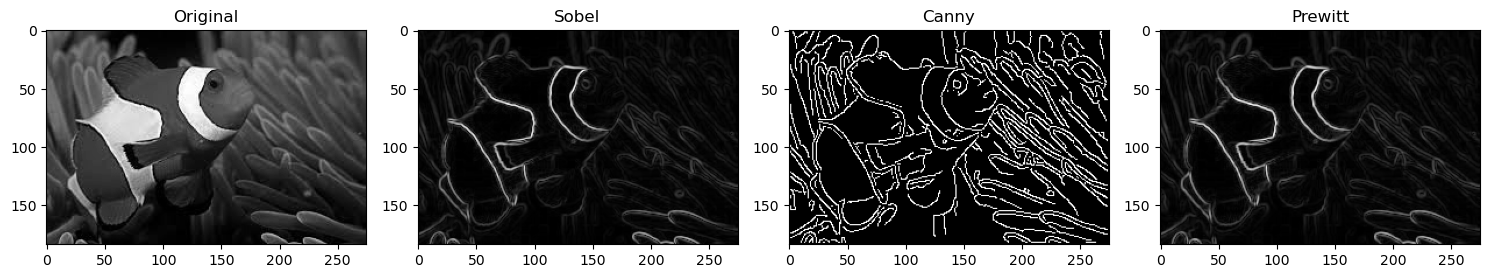

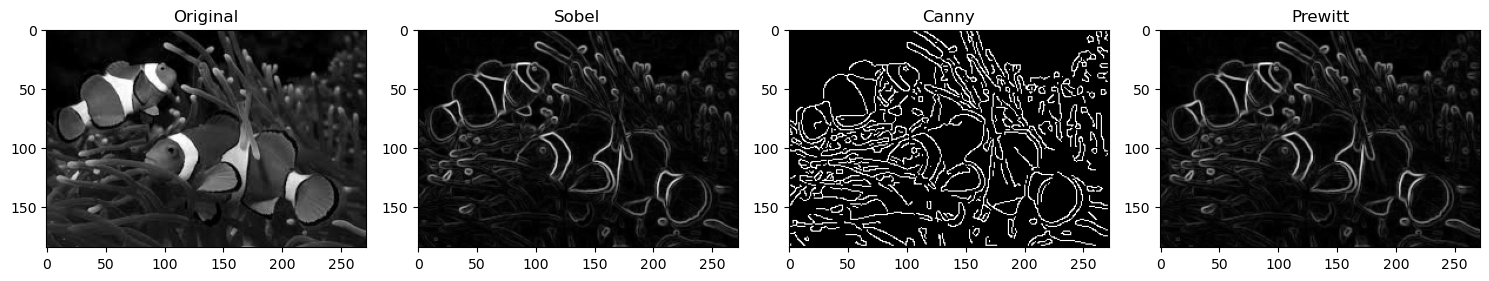

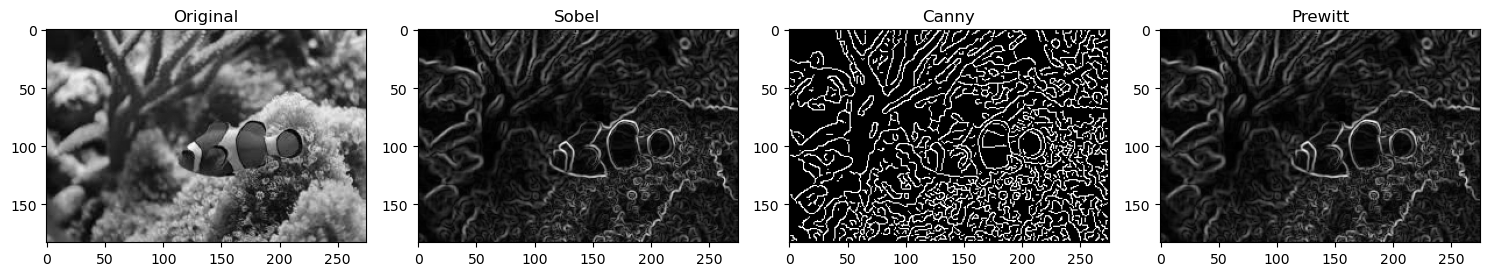

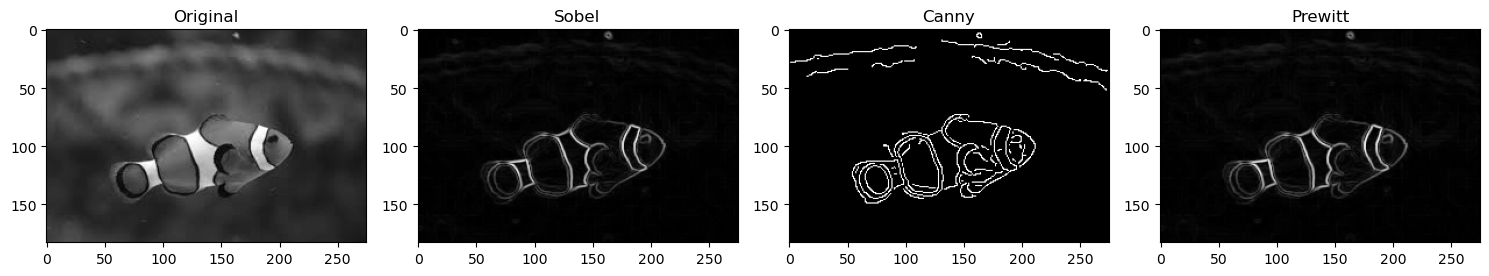

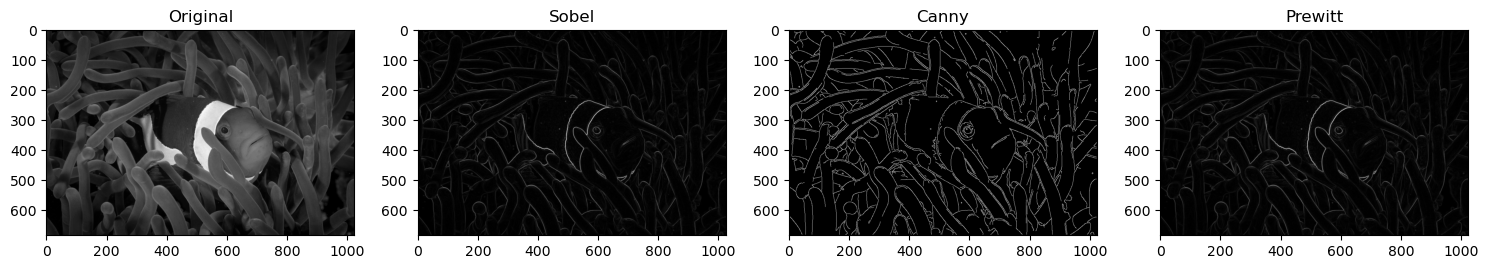

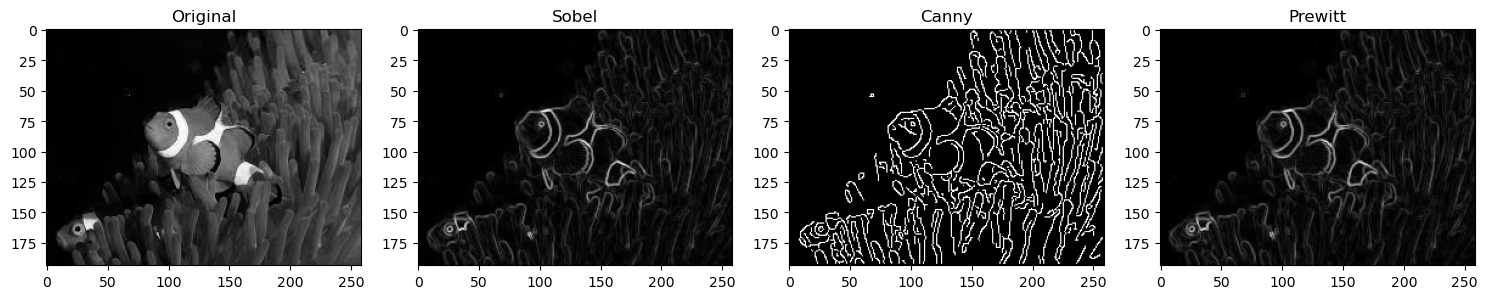

In [29]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, feature

for img in imgs:
    
    #Convertir a escala de grises
    gray_img = color.rgb2gray(img)
    
    # Aplicar los filtros
    sobel_edges = filters.sobel(gray_img)
    canny_edges = feature.canny(gray_img, sigma=1)
    prewitt_edges = filters.prewitt(gray_img)
    
    # Mostrar los resultados
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    ax[0].imshow(gray_img, cmap='gray')
    ax[0].set_title('Original')
    ax[1].imshow(sobel_edges, cmap='gray')
    ax[1].set_title('Sobel')
    ax[2].imshow(canny_edges, cmap='gray')
    ax[2].set_title('Canny')
    ax[3].imshow(prewitt_edges, cmap='gray')
    ax[3].set_title('Prewitt')
    plt.tight_layout()
    plt.show()

Observamos que los filtros de Sobel y de Prewitt son muy similares, detectando bordes más suaves, detectando solo los bordes principales. Mientras, Canny detecta los bordes con mucha más precisión y detecta detalles más finos.